In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
 
# importing ploting libraries
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.model_selection import KFold, GridSearchCV

import numpy as np
from scipy import stats

# calculate accuracy measures and confusion matrix
#from sklearn import metrics

# EDA, & Bivariate Analysis

In [3]:
df = pd.read_csv('concrete.csv')
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [4]:
df.shape
# 1030 rows & 9 columns (8 input variables and 1 output variable)


(1030, 9)

In [5]:
#Basic Info
df.info()
#float64 & integer data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
df.isnull().sum()
# Any null value- No

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [7]:
df.isnull().values.any()

False

In [8]:
df.nunique() # Number of unique values in a column

cement          278
slag            185
ash             156
water           195
superplastic    111
coarseagg       284
fineagg         302
age              14
strength        845
dtype: int64

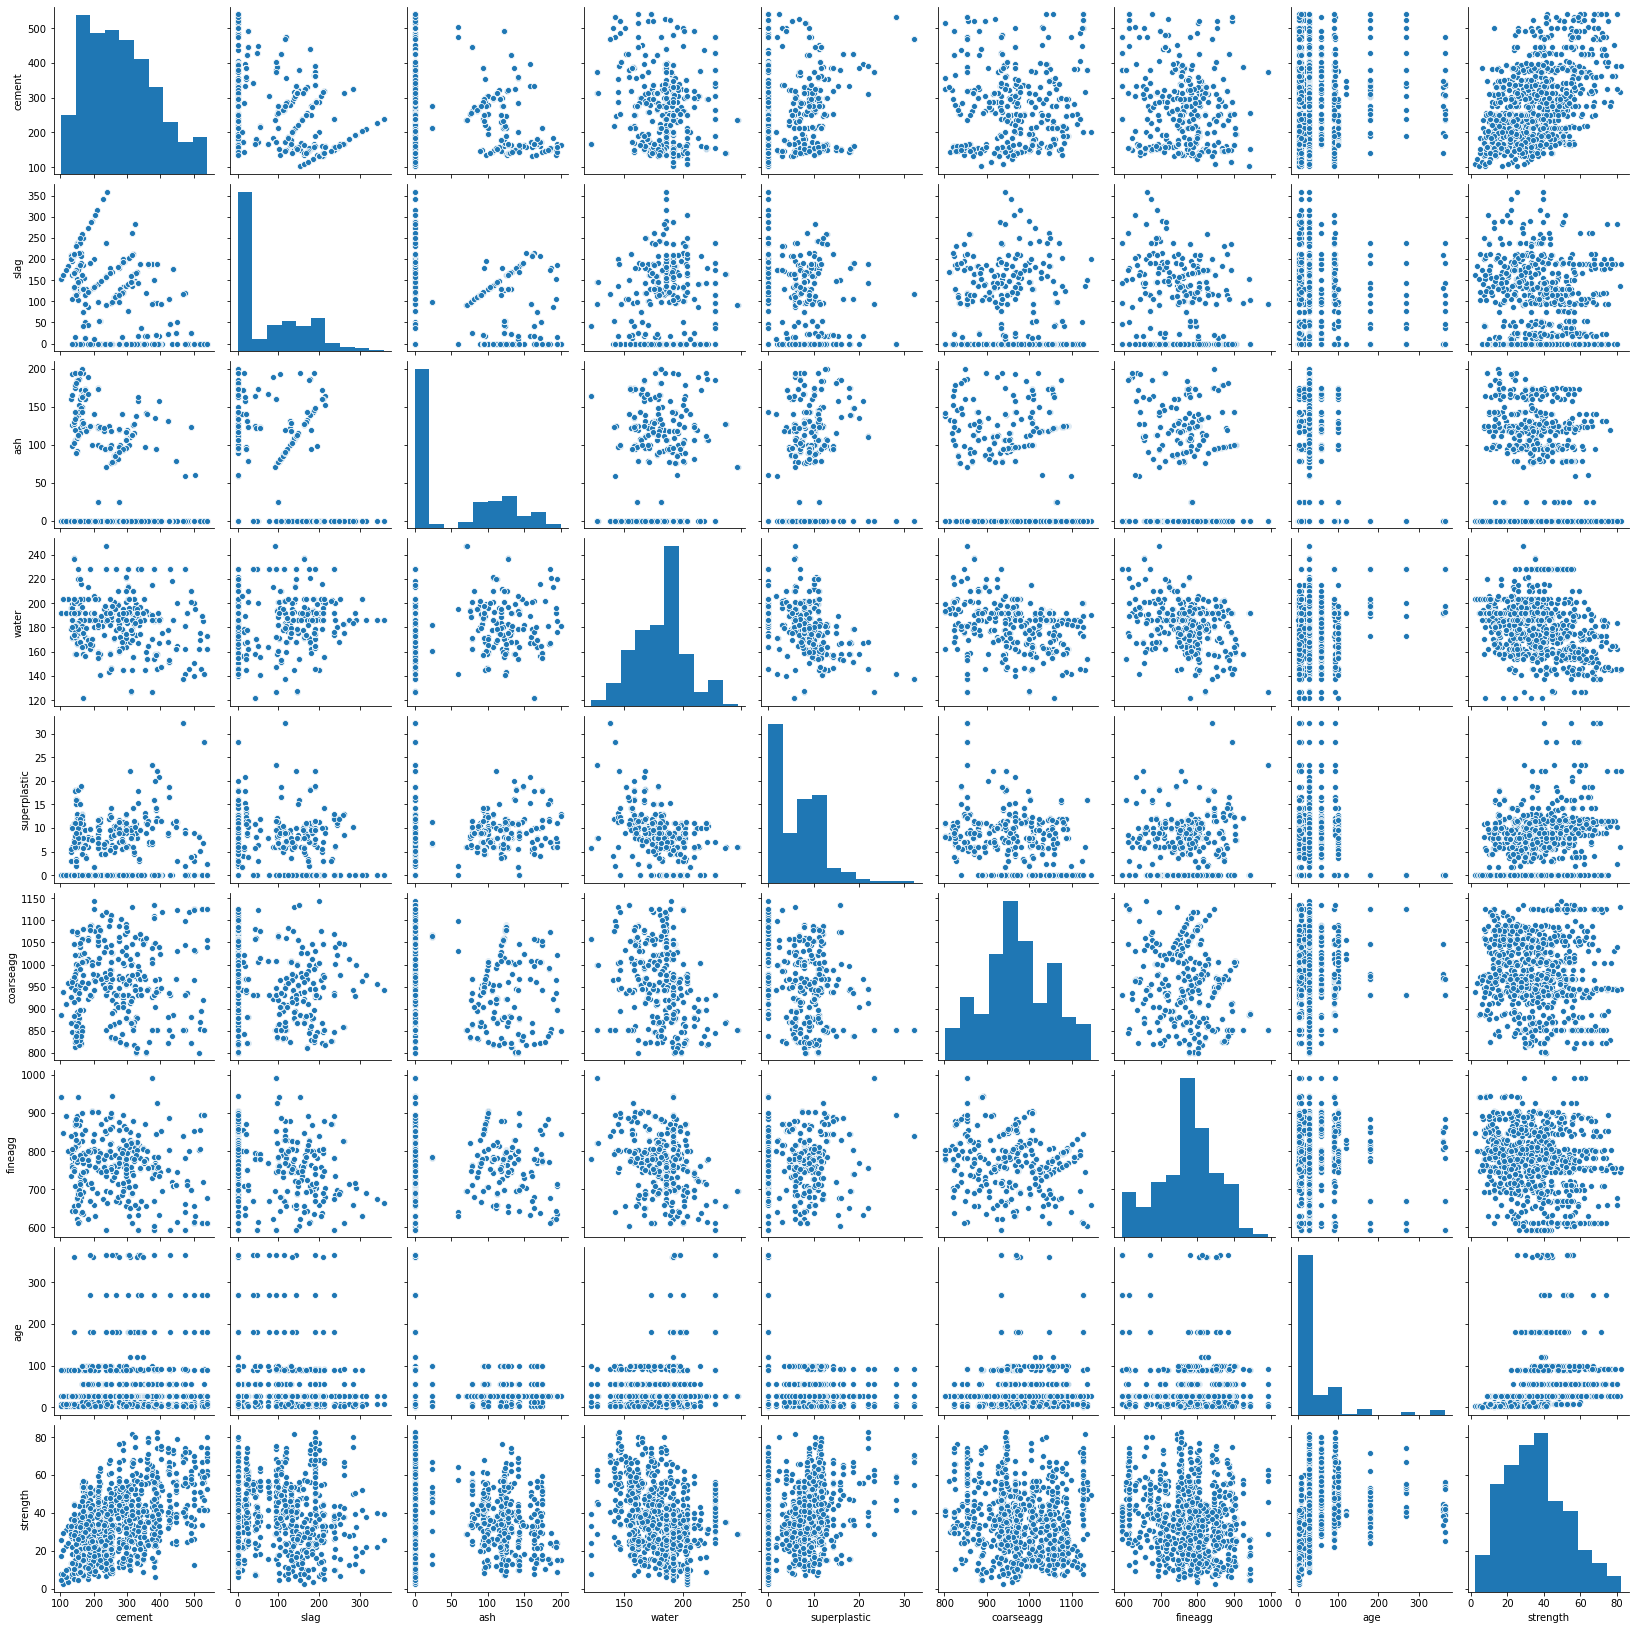

In [9]:
sns.pairplot(df) # different variables plotted against eachother to see trends: Overall scattered data., This gives visual representation of correlation between features.
# Strengrth increases as amount of cement increases

In [10]:
df.corr()   # correlation between every possible pair of attributes as a dataframe

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


Text(0.5, 1.0, 'Correlation between different attributes')

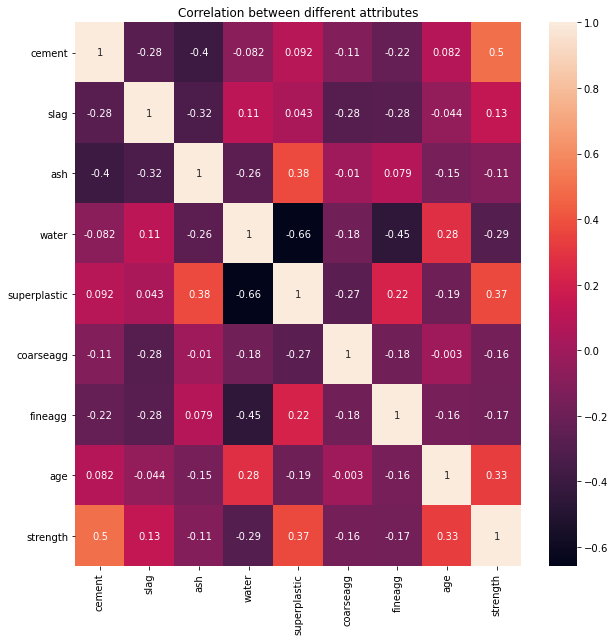

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)  # plot the correlation coefficients as a heatmap
plt.title('Correlation between different attributes')
#Highest correlation coefficeint is 0.5- Poor correlation amomg variables overall.
# Observed that strength and cement is relatively good correlation.
#Age and super plast are other influencing factors.

In [12]:
#distribution of the various attribute
df.describe().transpose()
# Zero values does not mena null value here.
#standard deviation is highest in Cement and slag component.

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [13]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(Q1)
print(Q3)
print(IQR)

cement          192.375
slag              0.000
ash               0.000
water           164.900
superplastic      0.000
coarseagg       932.000
fineagg         730.950
age               7.000
strength         23.710
Name: 0.25, dtype: float64
cement           350.000
slag             142.950
ash              118.300
water            192.000
superplastic      10.200
coarseagg       1029.400
fineagg          824.000
age               56.000
strength          46.135
Name: 0.75, dtype: float64
cement          157.625
slag            142.950
ash             118.300
water            27.100
superplastic     10.200
coarseagg        97.400
fineagg          93.050
age              49.000
strength         22.425
dtype: float64


<Figure size 432x288 with 0 Axes>

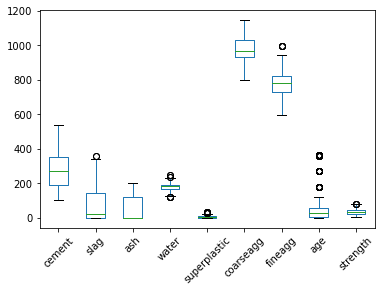

<Figure size 432x288 with 0 Axes>

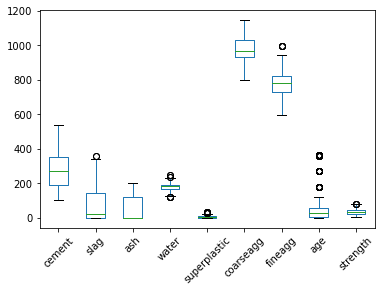

<Figure size 432x288 with 0 Axes>

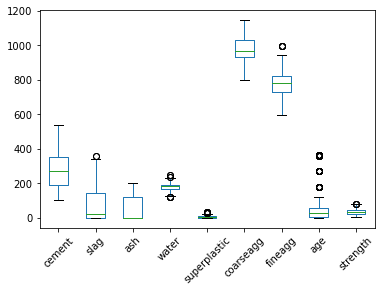

<Figure size 432x288 with 0 Axes>

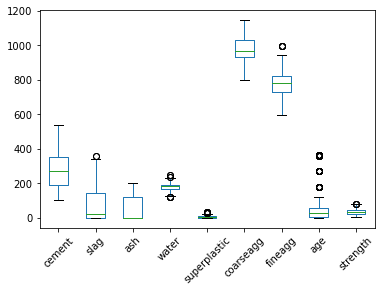

<Figure size 432x288 with 0 Axes>

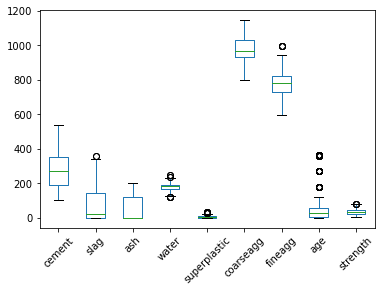

<Figure size 432x288 with 0 Axes>

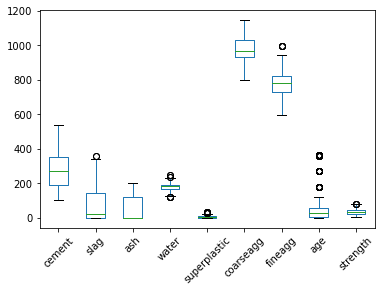

<Figure size 432x288 with 0 Axes>

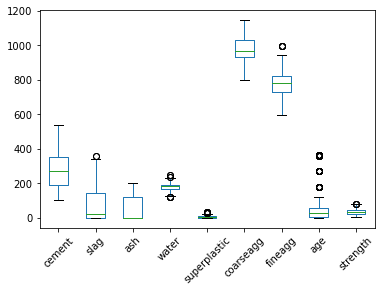

<Figure size 432x288 with 0 Axes>

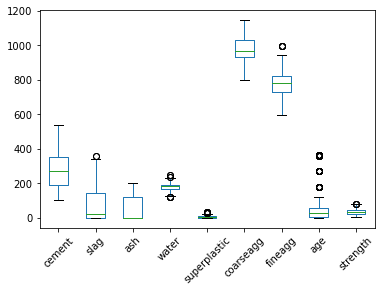

<Figure size 432x288 with 0 Axes>

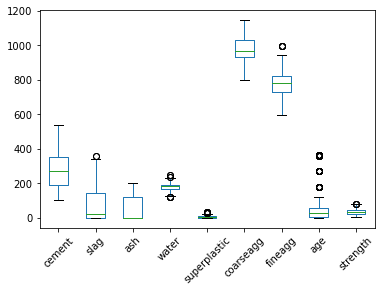

In [14]:
#Box plot shows outliers for all variables
for column in df:
    plt.figure()
    df.plot(kind='box', rot=45)
    

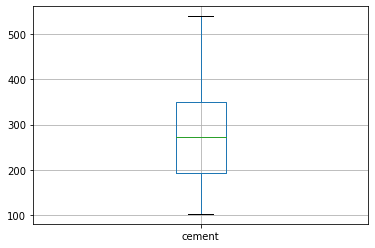

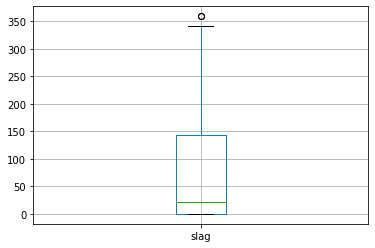

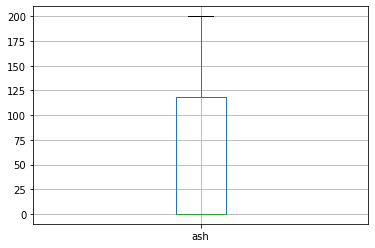

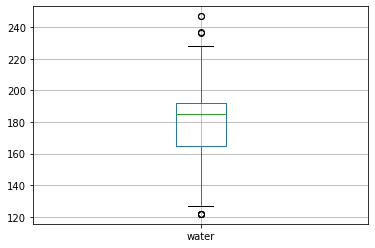

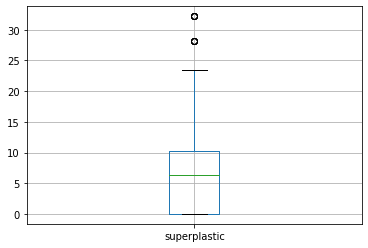

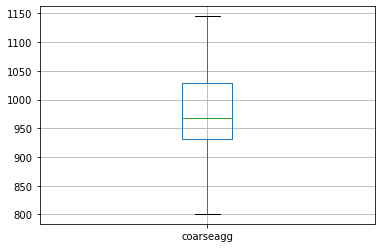

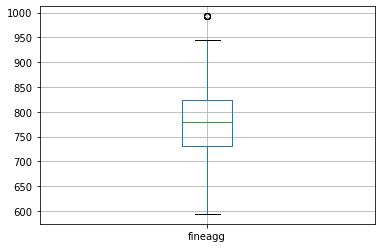

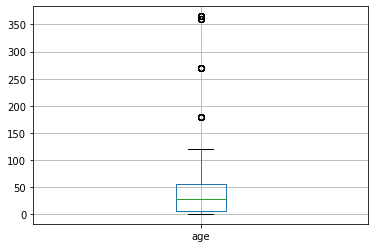

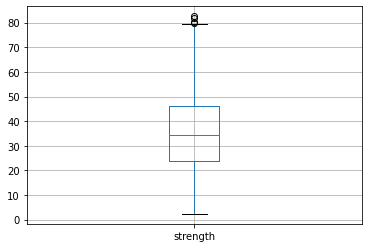

In [15]:
#Box plot for outliers for each variable
for column in df:
    plt.figure()
    df.boxplot([column])

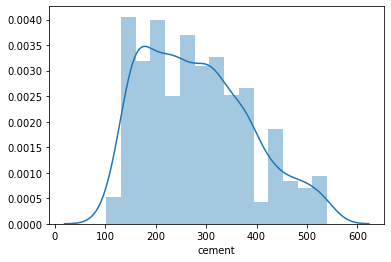

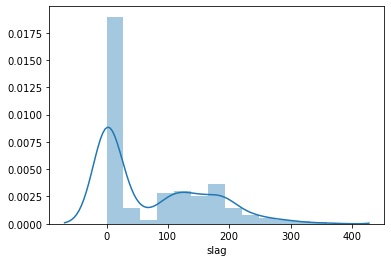

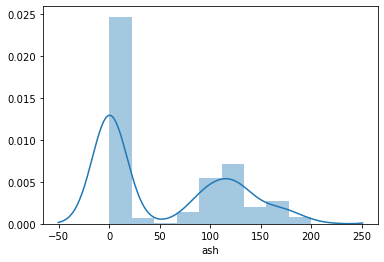

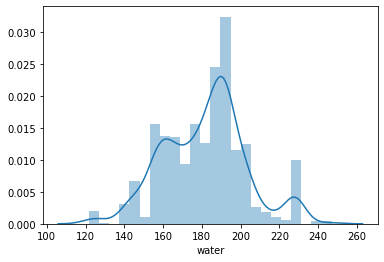

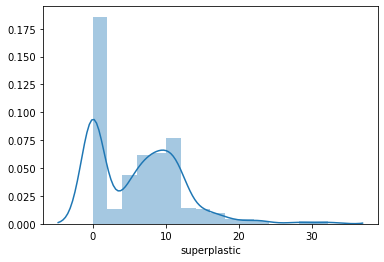

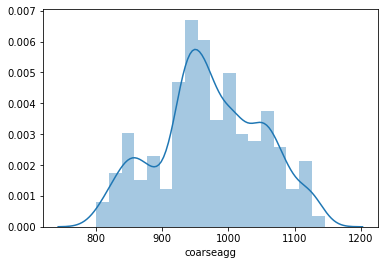

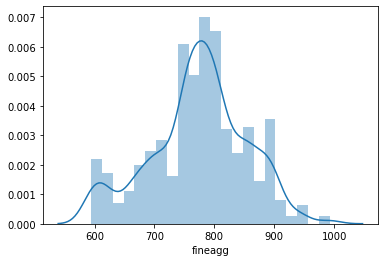

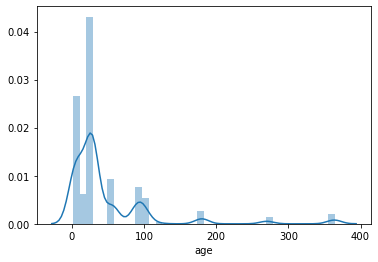

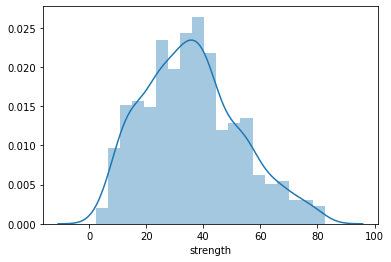

In [16]:
for i in ['cement','slag','ash','water','superplastic','coarseagg','fineagg','age','strength']:
    sns.distplot(df[i])
    plt.show()

# Observations
1-cement is almost normal
2- Slag is skewed to right. 2-3 Guassians
3-Ash has bimodal distribution
4-Water has 3 guassians- slight skeweness to left
5-superplastics skewed to right and two guassians
6-Coarseagg- no skeweness with 3 guassians
7-fineagg: loks normal
8-age:is highly skewed to right and multiple peaks
9-strength: normal distribution


# Handling outliers, Scaling split Data as Feature Engineering Techniques

In [17]:
#outliers reduction and filling up with median values: Still fine agg, age and strength variables shows few data in outliers.
for cols in df.columns [:-1]:
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    iqr = Q3-Q1
    low = Q1-1.5*iqr
    high = Q3+1.5*iqr
    df.loc[(df[cols] < low) | (df[cols] > high), cols] = df[cols].median()

<Figure size 432x288 with 0 Axes>

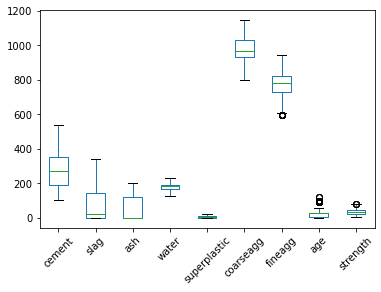

<Figure size 432x288 with 0 Axes>

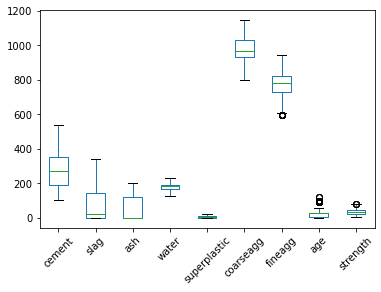

<Figure size 432x288 with 0 Axes>

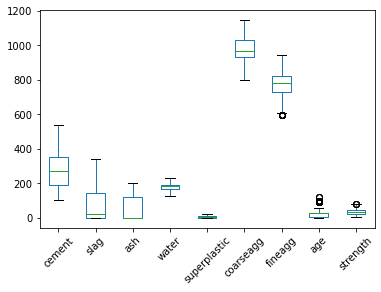

<Figure size 432x288 with 0 Axes>

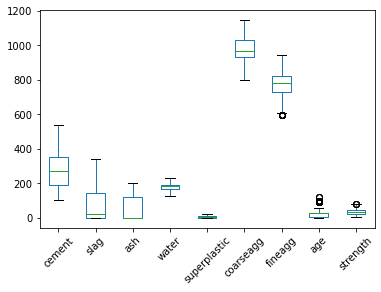

<Figure size 432x288 with 0 Axes>

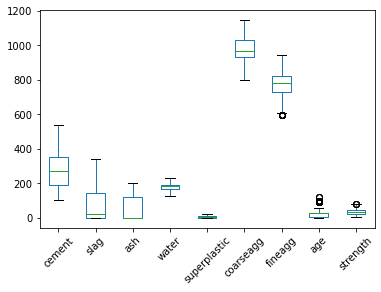

<Figure size 432x288 with 0 Axes>

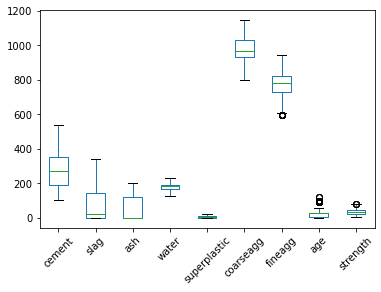

<Figure size 432x288 with 0 Axes>

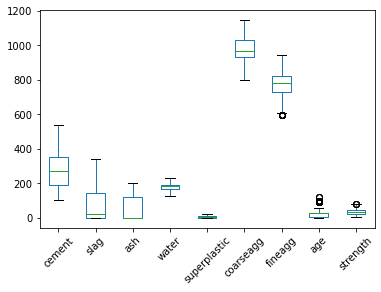

<Figure size 432x288 with 0 Axes>

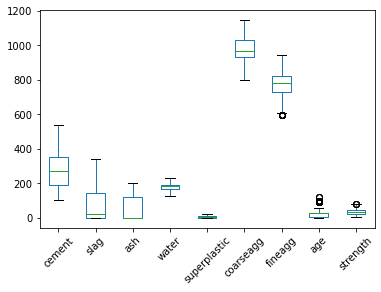

<Figure size 432x288 with 0 Axes>

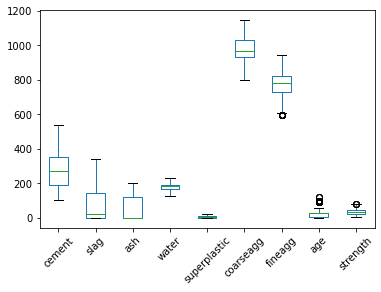

In [18]:
#Box plot to see outliers
for column in df:
    plt.figure()
    df.plot(kind='box', rot=45)

In [19]:
df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28.0,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28.0,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28.0,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28.0,13.29
1026,531.3,0.0,0.0,141.8,6.4,852.1,893.7,3.0,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28.0,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,28.0,55.06


In [20]:
def preprocess_inputs(df):
    df = df.copy()
    y=df['strength'].copy()
    X=df.drop('strength', axis=1).copy()
    
    #Train_test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)
    
    # Scale X with standard Scaler
    scaler=StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)    
    
    
    return X_train, X_test, y_train, y_test

In [21]:
X_train, X_test, y_train, y_test  = preprocess_inputs(df)

In [22]:
X_train

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,0.253152,-0.863364,-0.830119,0.450657,-1.067234,-0.013961,1.018013,-0.149387
1,-0.310218,1.075079,-0.830119,0.997218,-1.067234,0.082839,-0.923509,-1.041599
2,2.043122,-0.863364,-0.830119,0.830873,-1.067234,1.960248,-1.933499,-0.149387
3,-1.268323,0.756654,0.864858,0.483926,0.037944,-1.002339,0.146259,-0.149387
4,-0.298913,-0.863364,1.016251,0.284312,0.092297,0.729870,-0.131458,-1.041599
...,...,...,...,...,...,...,...,...
716,0.403886,-0.863364,1.323719,0.783346,0.925710,-2.166485,0.295702,-0.149387
717,-0.913156,0.578847,-0.830119,0.151236,-1.067234,1.430396,-0.049264,-0.898845
718,0.959719,-0.863364,-0.830119,0.165494,-1.067234,-0.064908,-0.065453,-0.149387
719,0.748691,1.333073,-0.830119,-0.837326,1.034416,-0.336203,-0.155119,-0.149387


In [23]:
X_train.mean()

cement         -5.395592e-16
slag           -3.834196e-17
ash             4.764258e-16
water           8.892563e-16
superplastic   -5.081465e-18
coarseagg      -6.787605e-16
fineagg         1.573714e-15
age            -3.410741e-17
dtype: float64

In [24]:
X_train.var()

cement          1.001389
slag            1.001389
ash             1.001389
water           1.001389
superplastic    1.001389
coarseagg       1.001389
fineagg         1.001389
age             1.001389
dtype: float64

In [25]:
y_train

666    27.92
237     9.73
725    44.09
802    23.70
568    13.12
       ...  
47     40.68
638     8.00
113    31.35
96     71.30
106     9.74
Name: strength, Length: 721, dtype: float64

###### **Model Selection**

In [26]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [27]:
models = {
    "                      LinearRegression": LinearRegression(),
    "                 L2 (Ridge) Regression": Ridge(),
    "Support Vector Machine (Linear Kernel)": LinearSVR(),
    "   Support Vector Machine (RBF Kernel)": SVR(),
    "                         Decision Tree": DecisionTreeRegressor(),
    "                         Random Forest": RandomForestRegressor(),
    "                      GradientBoosting": GradientBoostingRegressor(),
    "                              AdaBoost":AdaBoostRegressor()
}
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

                      LinearRegression trained.
                 L2 (Ridge) Regression trained.
Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.
                         Decision Tree trained.
                         Random Forest trained.
                      GradientBoosting trained.
                              AdaBoost trained.


In [28]:
for name, model in models.items():
    print(name + "R^2: {:.5f}".format(model.score(X_train, y_train)))

                      LinearRegressionR^2: 0.70730
                 L2 (Ridge) RegressionR^2: 0.70729
Support Vector Machine (Linear Kernel)R^2: 0.69988
   Support Vector Machine (RBF Kernel)R^2: 0.70664
                         Decision TreeR^2: 0.99172
                         Random ForestR^2: 0.97849
                      GradientBoostingR^2: 0.94248
                              AdaBoostR^2: 0.81198


In [ ]:
# Models Decision Tree, Randon Forest and Gradient Boosting have very high score while others have low score.
# Lets see if these high scores train data are over-fit or fit well on test data.

In [29]:
for name, model in models.items():
    print(name + "R^2: {:.5f}".format(model.score(X_test, y_test)))

                      LinearRegressionR^2: 0.73171
                 L2 (Ridge) RegressionR^2: 0.73140
Support Vector Machine (Linear Kernel)R^2: 0.72366
   Support Vector Machine (RBF Kernel)R^2: 0.71535
                         Decision TreeR^2: 0.83547
                         Random ForestR^2: 0.90055
                      GradientBoostingR^2: 0.90803
                              AdaBoostR^2: 0.80096


In [ ]:
# Huge drop in accuracy in Decision Tree & Random Forest model on test data sets. These are definitely overfit train data sets.
#Gradient Boosting shows shows relatively less difference in accuracy - Lets see if KFold cross validation helps or we try hyperparameter tunning?
#Linear Regression & SVM showed some improment in accuracy but overall results are not good- we exclude these datas from further analysis.

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Tesing  KFold cross Validation
#X=df.drop('strength', axis=1)
#y=df['strength']
#from scipy.stats import zscore
#Xscaled = X.apply(zscore)
#Xscaled_df=pd.DataFrame(Xscaled, columns=df.columns)

    #Train_test split
    X_train, X_test, y_train, y_test = train_test_split(Xscaled, y, test_size=0.3, random_state=1)

#model = GradientBoostingRegressor()
#model.fit(X_train, y_train)

#y_pred = model.predict(X_test)

#y_pred

#model.score(X_train, y_train)
0.9430469892492805
#model.score(X_test, y_test)
0.8917149980037467
#import sklearn.metrics as metrics
#acc_R=metrics.r2_score(y_test, y_pred)
acc_R
0.8917149980037467
#metrics.mean_squared_error(y_test, y_pred)
31.515219227894544
#k = 20
#kfold = KFold(n_splits=k, random_state=70)
#K_results = cross_val_score(model,X, y, cv=kfold)
#accuracy=np.mean(abs(K_results))
accuracy
0.8997479422923368

In [ ]:
# Kfold cross validation did not imporve the results accuracy for this model Similar results were for Random forest model.
Lets move to model optimization and see what it brings to accuracy.

# **Model Optimization**

In [31]:
best_model = GradientBoostingRegressor()
best_model.fit(X_train, y_train)
print("Model R^2 (Prior Optimization): {:.5f}".format(best_model.score(X_test, y_test)))

Model R^2 (Prior Optimization): 0.90886


In [32]:
# Fine Tunning
params = {
    'learning_rate': [0.01, 0.1, 1.0],
    'n_estimators': [100, 150, 250],
    'max_depth' : [3, 4, 5]  
}
clf = GridSearchCV(best_model, params)
clf.fit(X_train, y_train)
clf.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 250}

In [33]:
print("Model R^2 (Post Optimization): {:.5f}".format(clf.score(X_test, y_test)))

Model R^2 (Post Optimization): 0.93635


In [34]:
clf

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 150, 250]})

In [ ]:
# Change of parameters n_estimators from 200- to 250 or 300, results in R^2 94%. Its 4% increase with model optimization with regards to tunning to 
# in hyperparameters of GridSearchCV.

In [ ]:
#Conclusion: Analysed the compressive strength Data and used ML to predict best fit model. I used different models  
& GradientBoosting Regressor was less over fit model, then performance of algorithm by tuning the hyperparameter by performing grid search 
is imporved signficantly.

In [ ]:
#R_squared is a statistical measure which exhibits the quaility of fit of a regression model. The ideal value is 1, best model.
#The value of R2 can be negative which shows model fitted is worse than average model.

In [ ]:
# With current Data analysis, Cement, water and age has influence on strength. This may indicate that further investigations
into variables, are they necessary to add or can be cost reduction done. With more age and less water and quantity of cement 
increases the strength. We can furthet investigate how to play these parameters with respect to business terms.